In [4]:
%matplotlib inline

import numpy as np

import pandas as pd
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('whitegrid')

In [6]:
df = pd.read_csv('../data/prices_round_2_day_-1.csv', index_col='timestamp', delimiter=';')
df.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
0,-1,PINA_COLADAS,14999,38,14998.0,53.0,NaN,NaN,15001,38,15002.0,53.0,NaN,NaN,15000.0,0.0
0,-1,COCONUTS,7999,162,NaN,NaN,NaN,NaN,8001,55,8002.0,107.0,NaN,NaN,8000.0,0.0
0,-1,BANANAS,4951,1,4946.0,2.0,4945.0,29.0,4952,31,NaN,NaN,NaN,NaN,4951.5,0.0
100,-1,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0


# Seasonal Decomposition

In [7]:
def plot_correlogram(x, lags=None, title=None):
    lags = min(10, int(len(x)/5)) if lags is None else lags
    with sns.axes_style('whitegrid'):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
        x.plot(ax=axes[0][0], title='Residuals')
        x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
        q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
        stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
        axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
        probplot(x, plot=axes[0][1])
        mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
        s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
        axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
        plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
        plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
        axes[1][0].set_xlabel('Lag')
        axes[1][1].set_xlabel('Lag')
        fig.suptitle(title, fontsize=14)
        sns.despine()
        fig.tight_layout()
        fig.subplots_adjust(top=.9)

## Pearls Analysis

In [8]:
df_pearls = df.loc[df['product']=='PEARLS'][['mid_price']]

In [9]:
components_pearls = tsa.seasonal_decompose(df_pearls['mid_price'], model='additive', period=100)

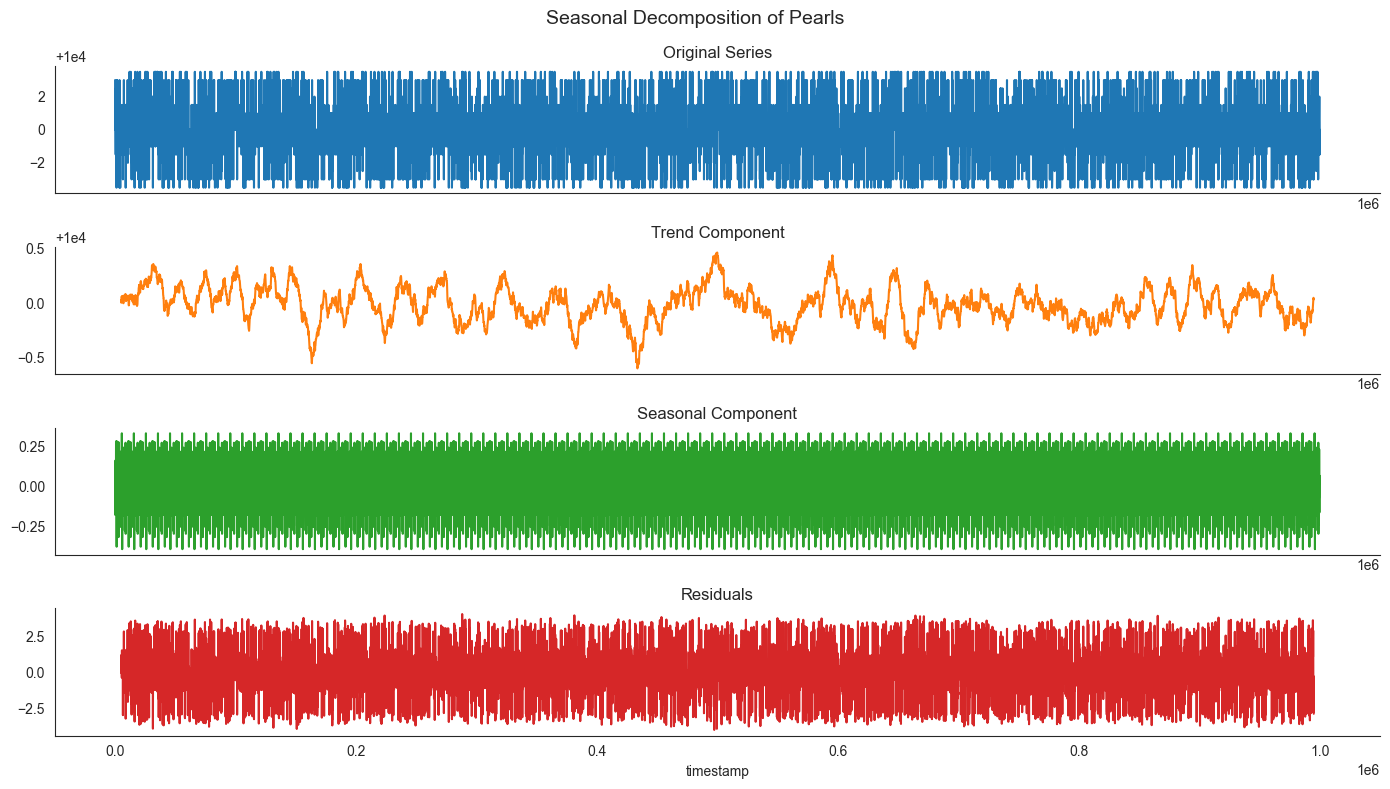

In [10]:
ts_pearls = (df_pearls['mid_price'].to_frame('Original')
      .assign(Trend=components_pearls.trend)
      .assign(Seasonality=components_pearls.seasonal)
      .assign(Residual=components_pearls.resid))
with sns.axes_style('white'):
    ts_pearls.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition of Pearls', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

c:\Users\redce\Documents\cs-stuff\imc-2023\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


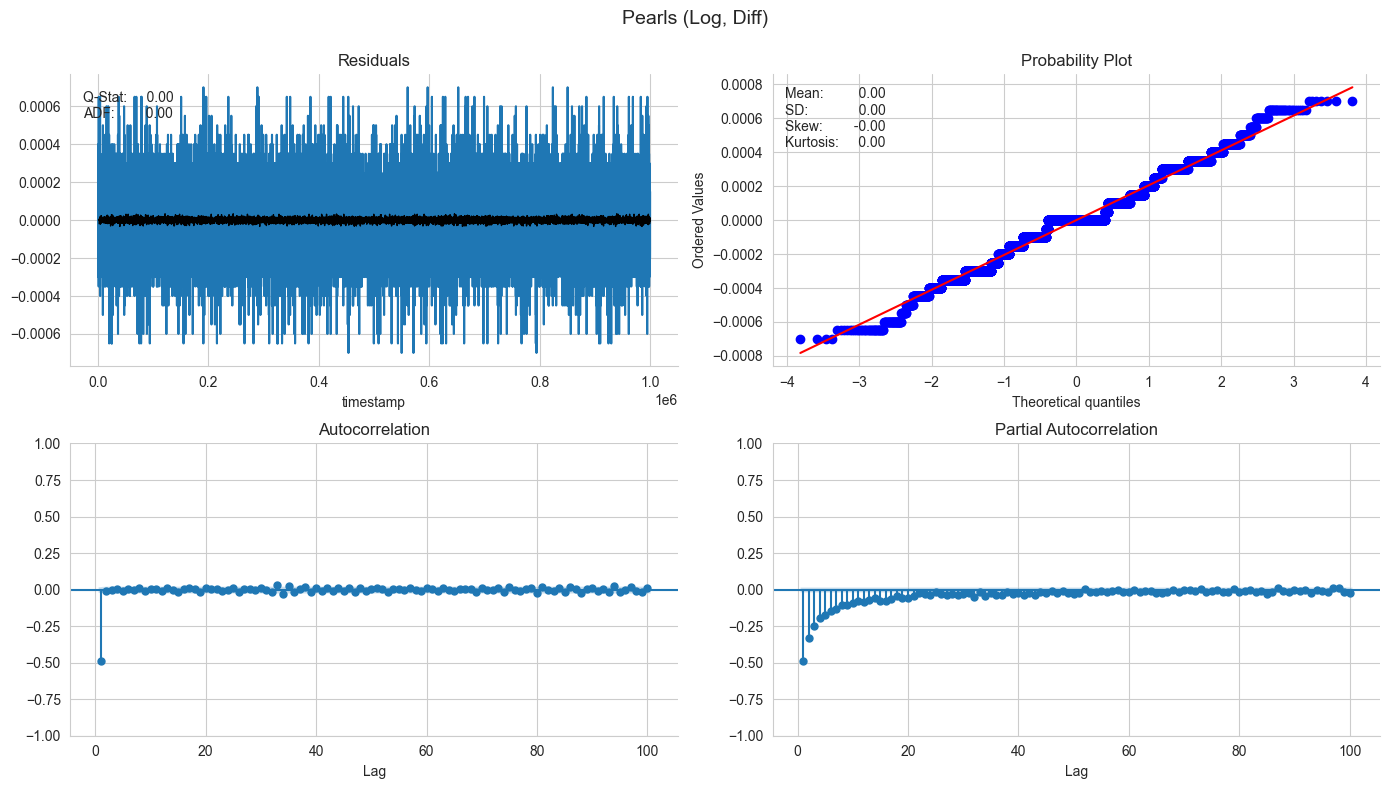

In [11]:
pearls_log = np.log(df_pearls['mid_price'])
pearls_log_diff = pearls_log.diff().dropna()

plot_correlogram(pearls_log_diff, lags=100, title='Pearls (Log, Diff)')

## Bananas Analysis

In [12]:
df_bananas = df.loc[df['product']=='BANANAS'][['mid_price']]

In [13]:
components_bananas = tsa.seasonal_decompose(df_bananas['mid_price'], model='additive', period=100)

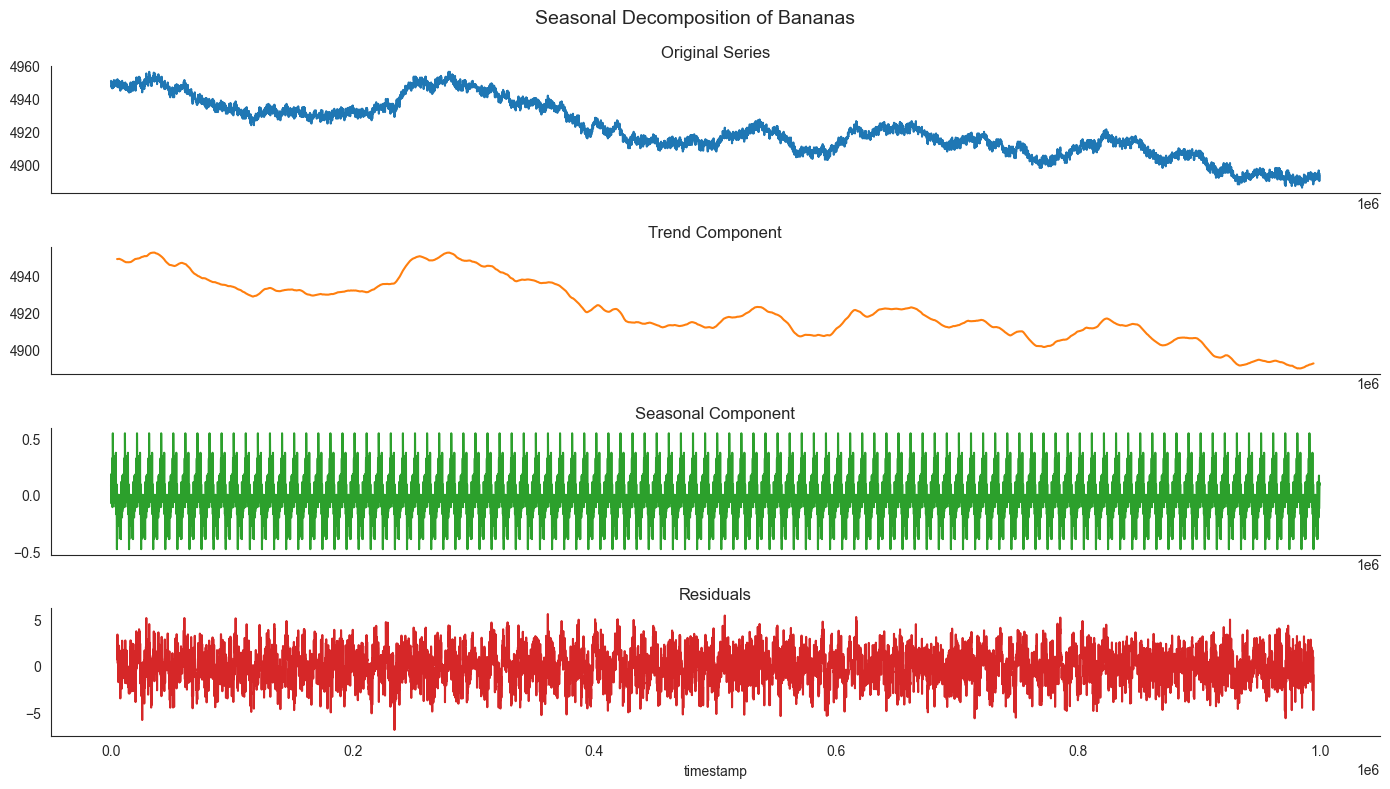

In [14]:
ts_bananas = (df_bananas['mid_price'].to_frame('Original')
      .assign(Trend=components_bananas.trend)
      .assign(Seasonality=components_bananas.seasonal)
      .assign(Residual=components_bananas.resid))
with sns.axes_style('white'):
    ts_bananas.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition of Bananas', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

c:\Users\redce\Documents\cs-stuff\imc-2023\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


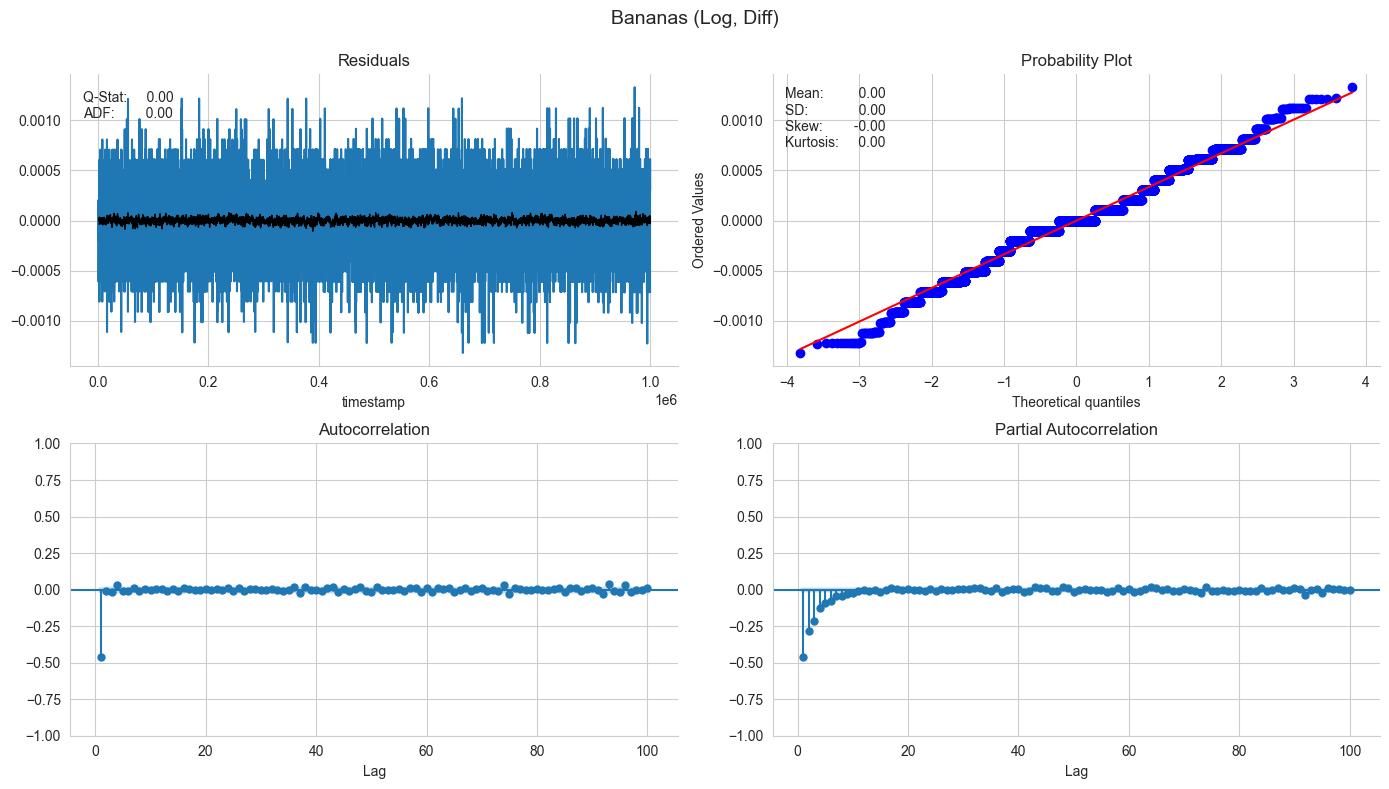

In [15]:
bananas_log = np.log(df_bananas['mid_price'])
bananas_log_diff = bananas_log.diff().dropna()

plot_correlogram(bananas_log_diff, lags=100, title='Bananas (Log, Diff)')

## Pina Colada Analysis

In [16]:
df_pina_coladas = df.loc[df['product']=='PINA_COLADAS'][['mid_price']]

In [17]:
components_pina_coladas = tsa.seasonal_decompose(df_pina_coladas['mid_price'], model='additive', period=100)

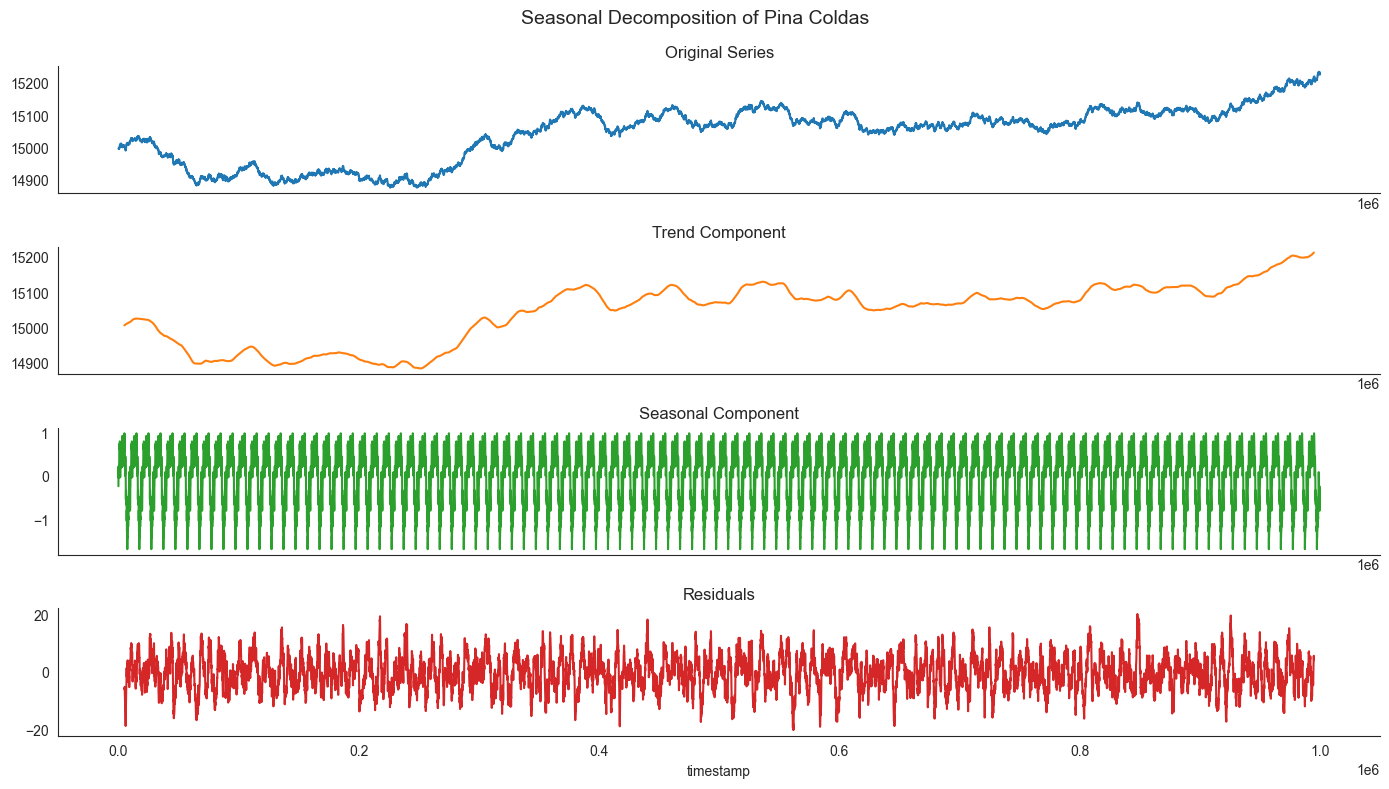

In [18]:
ts_pina_coladas = (df_pina_coladas['mid_price'].to_frame('Original')
      .assign(Trend=components_pina_coladas.trend)
      .assign(Seasonality=components_pina_coladas.seasonal)
      .assign(Residual=components_pina_coladas.resid))
with sns.axes_style('white'):
    ts_pina_coladas.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition of Pina Coldas', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

c:\Users\redce\Documents\cs-stuff\imc-2023\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


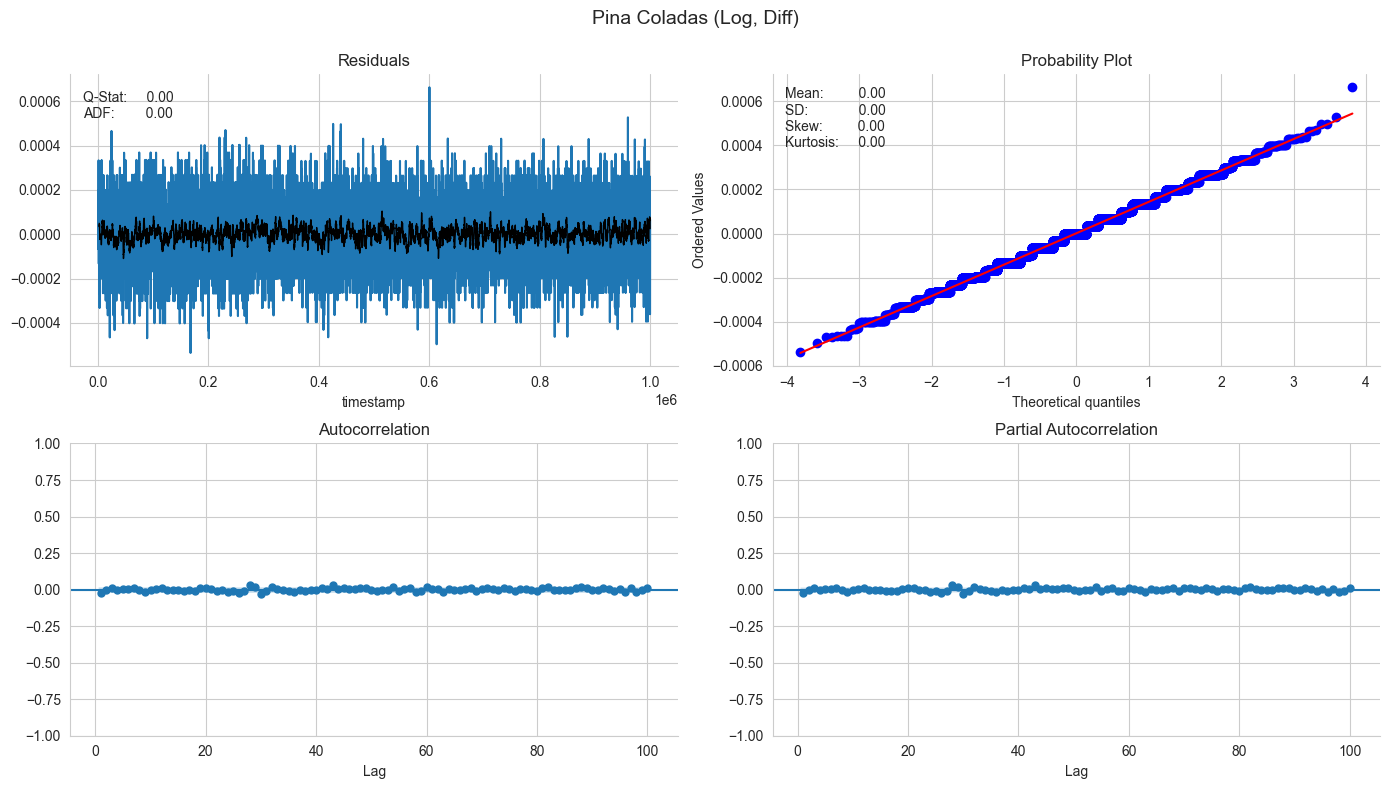

In [19]:
pina_coladas_log = np.log(df_pina_coladas['mid_price'])
pina_coladas_log_diff = pina_coladas_log.diff().dropna()

plot_correlogram(pina_coladas_log_diff, lags=100, title='Pina Coladas (Log, Diff)')

## Coconut Analysis

In [20]:
df_coconut = df.loc[df['product']=='COCONUTS'][['mid_price']]

In [21]:
components_coconut = tsa.seasonal_decompose(df_coconut['mid_price'], model='additive', period=100)

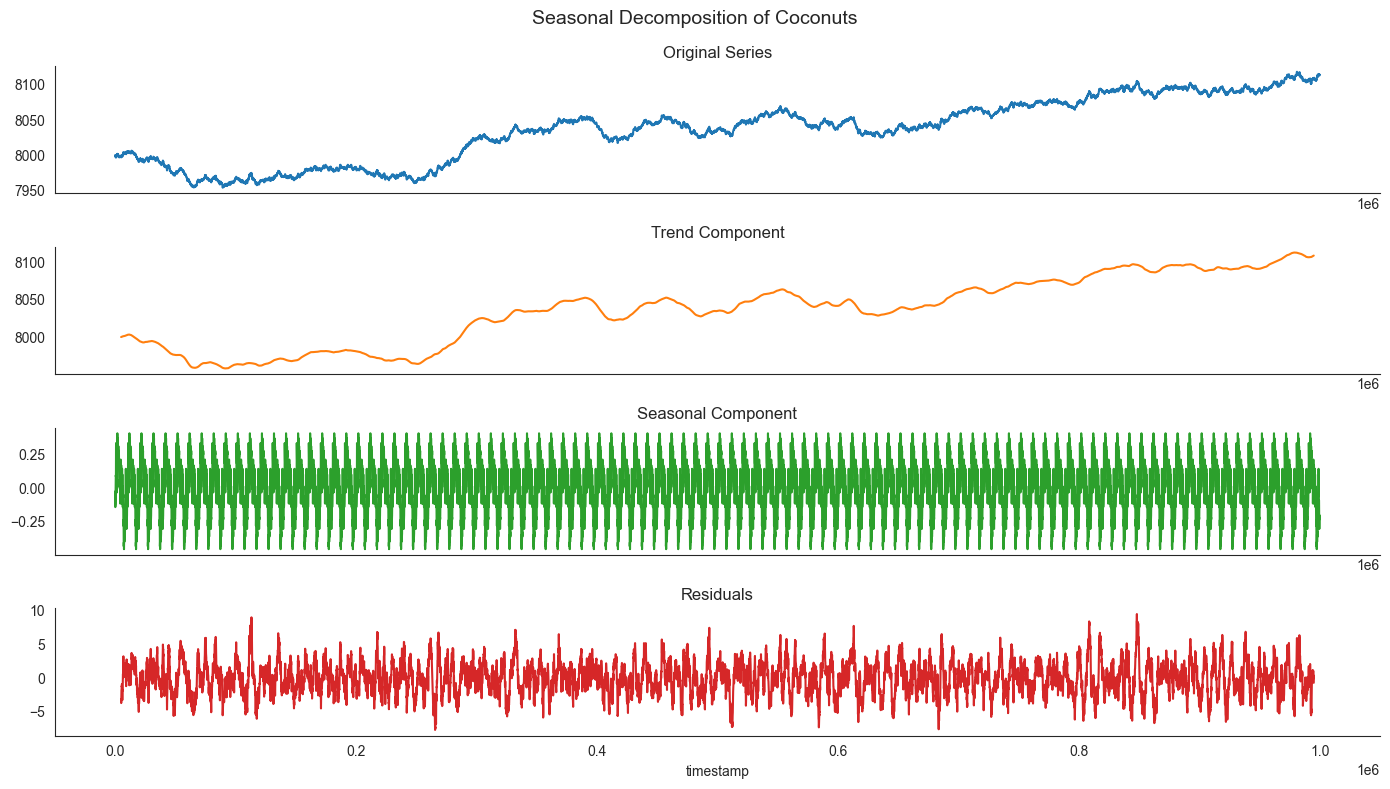

In [22]:
ts_coconut = (df_coconut['mid_price'].to_frame('Original')
      .assign(Trend=components_coconut.trend)
      .assign(Seasonality=components_coconut.seasonal)
      .assign(Residual=components_coconut.resid))
with sns.axes_style('white'):
    ts_coconut.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition of Coconuts', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

c:\Users\redce\Documents\cs-stuff\imc-2023\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


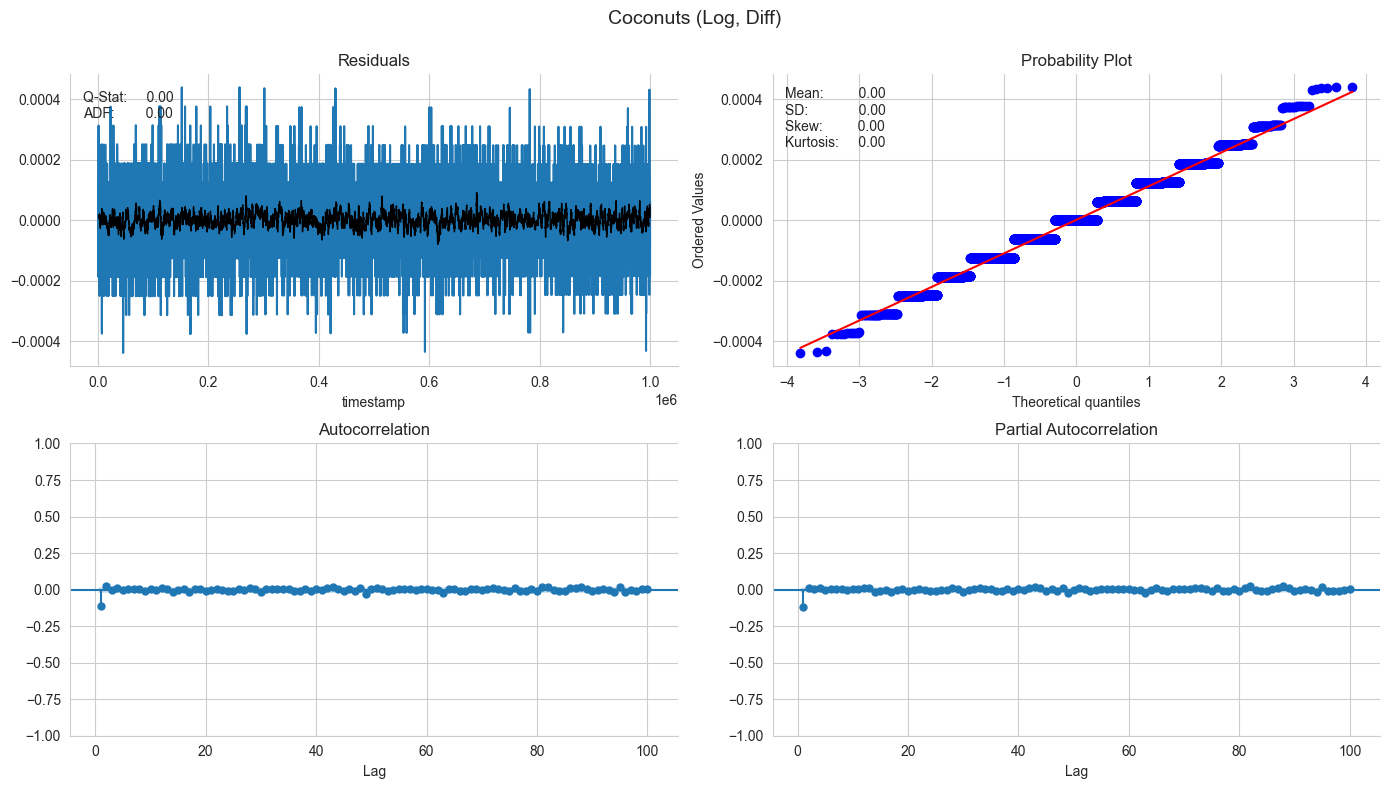

In [23]:
coconut_log = np.log(df_coconut['mid_price'])
coconut_log_diff = coconut_log.diff().dropna()

plot_correlogram(coconut_log_diff, lags=100, title='Coconuts (Log, Diff)')